<a href="https://colab.research.google.com/github/phylypo/TimeSeriesPrediction/blob/main/Time_Series_FBProphet_DeepAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Overview of Time Series Forecasting from Statistical to Recent ML Approaches 

Topics for this notebook in bold:
- Introduction to TS
- Decompose (*Time_Series_FFT.ipynb*)
 - Gen Synthic
 - Decompose FFT
- Naive approaches
- Statistical (*Time_Series_ES_ARIMA.ipynb*)
 - Smoothing techniques
 - ARIMA
 - State Space (*Time_Series_StateSpace.ipynb*)
- ML (*Time_Series_ML-LR_XGBoost.ipynb*)
  - Linear Regression
  - Decision Tree (XGBoost)
- DL (*Time_Series_DL_LSTM_CNN.ipynb*)
 - LSTM, CNN + LSTM
 - TCN (*Time_Series_DL_TCN_LSTNet.ipynb*)
 - LSTNet
 - TFT (*Time_Series_DL_TFT_N-BEATS.ipynb*)
 - N-BEATS
- **Commercial: (*Time_Series_Commercial.ipynb*)**
 - **Facebook Prophet**
 - **Amazon DeepAR**

## Commercial Applications

### Facebook Prophet
Prophet is a modular regression
model with interpretable parameters that can be intuitively adjusted by analysts. It decomposed the series into three main model components: 
1. trend
2. seasonality
3. holidays

Use only time as a regressor but possibly several linear and non-linear functions of time as components. 

Has a number of advantages:
- Flexibility: We can easily accommodate seasonality with multiple periods
- Fitting is very fast
- Has easily interpretable parameters

Ref:
- Paper: https://peerj.com/preprints/3190/
- Code:  https://github.com/facebookincubator/prophet
- Tutorial: https://www.digitalocean.com/community/tutorials/a-guide-to-time-series-forecasting-with-prophet-in-python-3



In [ ]:
!mkdir timeseries

In [ ]:
!curl -O https://assets.digitalocean.com/articles/eng_python/prophet/AirPassengers.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1748  100  1748    0     0   7375      0 --:--:-- --:--:-- --:--:--  7406


In [ ]:
!pip install pandas matplotlib numpy cython
!pip install pystan
!pip install fbprophet

#### Train

In [ ]:
#https://www.digitalocean.com/community/tutorials/a-guide-to-time-series-forecasting-with-prophet-in-python-3
%matplotlib inline
import pandas as pd
from fbprophet import Prophet

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
df = pd.read_csv('AirPassengers.csv')
df.head(5)

,Month,AirPassengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [ ]:
df.dtypes

Month            object
AirPassengers     int64
dtype: object

In [ ]:
df['Month'] = pd.DatetimeIndex(df['Month'])
df.dtypes

Month            datetime64[ns]
AirPassengers             int64
dtype: object

In [ ]:
df.head(5)

,Month,AirPassengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [ ]:
# don't rename Month --use for index, can't index ds, Prophet will complain
#df = df.rename(columns={'Month': 'ds','AirPassengers': 'y'})
df['ds']=df["Month"]
df = df.rename(columns={'AirPassengers': 'y'})
df.head(5) #1949-01 -> 1960-12

,Month,y,ds
0,1949-01-01,112,1949-01-01
1,1949-02-01,118,1949-02-01
2,1949-03-01,132,1949-03-01
3,1949-04-01,129,1949-04-01
4,1949-05-01,121,1949-05-01


In [ ]:
#df['ds'] = pd.DatetimeIndex(df['ds'])
#df.index #RangeIndex
df = df.set_index('Month') # don't set index on 'ds'
df.index #DateteimIndex
#df['1959':]

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [ ]:
df.head()

,y,ds
Month,,
1949-01-01,112,1949-01-01
1949-02-01,118,1949-02-01
1949-03-01,132,1949-03-01
1949-04-01,129,1949-04-01
1949-05-01,121,1949-05-01


In [ ]:
train_data = df[:"1959"] #1949-01 -> 1959-12
print(train_data.index)
test_data = df["1960":] #1960-01 => 1960-12
print(test_data.index)
train_data.head(5)

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1959-03-01', '1959-04-01', '1959-05-01', '1959-06-01',
               '1959-07-01', '1959-08-01', '1959-09-01', '1959-10-01',
               '1959-11-01', '1959-12-01'],
              dtype='datetime64[ns]', name='Month', length=132, freq=None)
DatetimeIndex(['1960-01-01', '1960-02-01', '1960-03-01', '1960-04-01',
               '1960-05-01', '1960-06-01', '1960-07-01', '1960-08-01',
               '1960-09-01', '1960-10-01', '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', freq=None)


,y,ds
Month,,
1949-01-01,112,1949-01-01
1949-02-01,118,1949-02-01
1949-03-01,132,1949-03-01
1949-04-01,129,1949-04-01
1949-05-01,121,1949-05-01


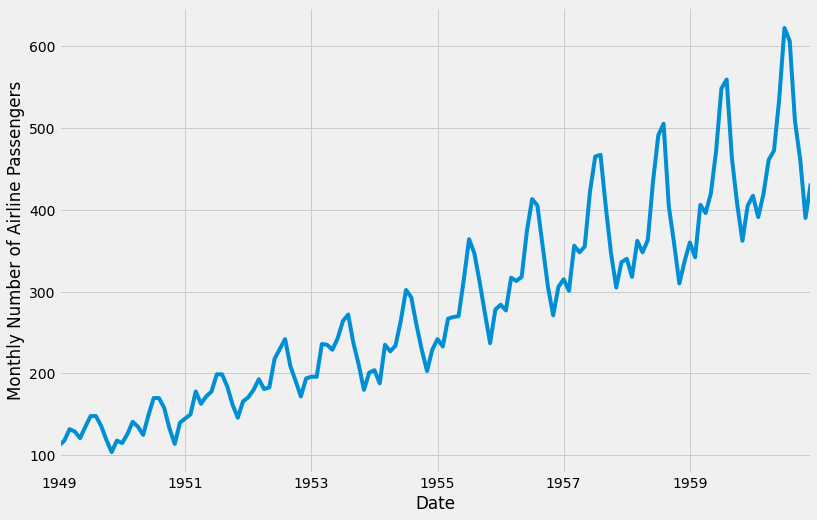

In [ ]:
#df = df.set_index('ds') # done on top
ax = df['y'].plot(figsize=(12, 8))
ax.set_ylabel('Monthly Number of Airline Passengers')
ax.set_xlabel('Date')

plt.show()

In [ ]:
# set the uncertainty interval to 95% (the Prophet default is 80%)
my_model = Prophet(interval_width=0.98, daily_seasonality=False, weekly_seasonality=False, yearly_seasonality=True,)
my_model.fit(train_data)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.


In [ ]:
future_dates = my_model.make_future_dataframe(periods=12, freq='MS')
future_dates.tail()

,ds
139,1960-08-01
140,1960-09-01
141,1960-10-01
142,1960-11-01
143,1960-12-01


#### Forecast and result

In [ ]:
future_dates.head()

,ds
0,1949-01-01
1,1949-02-01
2,1949-03-01
3,1949-04-01
4,1949-05-01


In [ ]:
forecast = my_model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
139,1960-08-01,524.361022,480.743703,566.594898
140,1960-09-01,485.319957,435.769775,532.657771
141,1960-10-01,452.658227,406.493989,501.254545
142,1960-11-01,423.892925,375.248677,467.046453
143,1960-12-01,446.588198,397.718138,495.228064


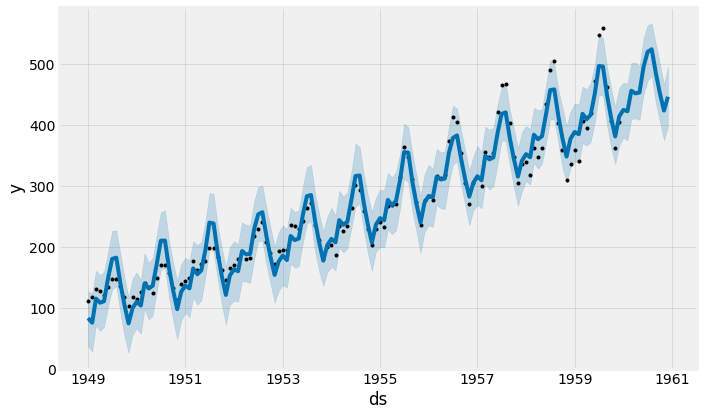

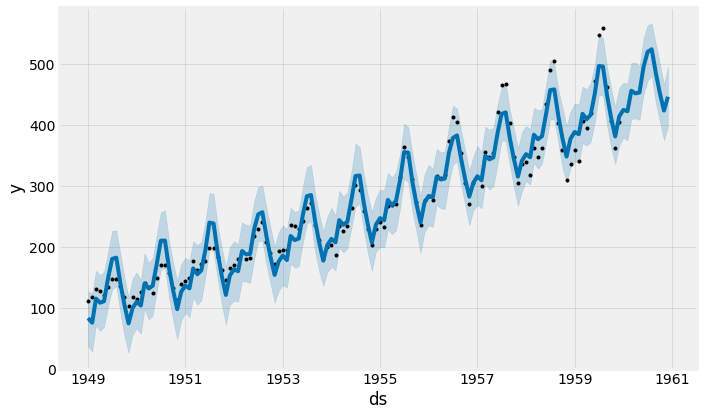

In [ ]:
my_model.plot(forecast, uncertainty=True)

Then compare to ARIMA - in the other notebook 

RMSE=90

In [ ]:
pd.options.mode.chained_assignment = None  # default='warn' supress warning

yhat = forecast[-12:]["yhat"]
test_data["yhat"] = yhat[0:12].to_numpy()
test_data['yhat_lower'] = forecast[-12:][['yhat_lower']].to_numpy()
test_data['yhat_upper'] = forecast[-12:][['yhat_upper']].to_numpy()

mae = abs(test_data["y"] - test_data["yhat"]).mean()
print("MAE:", mae) #33.91 vs 19.5 (ARIMA)

MAE: 33.91755993316479


In [ ]:
import numpy as np
MSE = ((test_data["y"] - test_data["yhat"])**2).mean()
RMSE = np.sqrt(MSE)
print("RMSE:", RMSE)

RMSE: 44.19293967508108


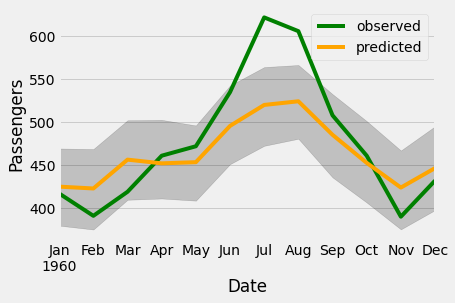

In [ ]:
ax = test_data['y'].plot(label='observed', color='green')
ax = test_data['yhat'].plot(label='predicted', color='orange')
#ax = test_data['yhat_lower'].plot(label='yhat_lower', color="gray")
#ax = test_data['yhat_upper'].plot(label='yhat_upper', color="gray")
ax.fill_between(test_data.index,
                test_data['yhat_lower'],
                test_data['yhat_upper'], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Passengers')
plt.legend()

plt.show()

In [ ]:
test_data

,y,ds,yhat,yhat_lower,yhat_upper
Month,,,,,
1960-01-01,417,1960-01-01,424.995013,379.600922,469.391969
1960-02-01,391,1960-02-01,422.841556,375.087119,468.753033
1960-03-01,419,1960-03-01,456.425111,409.710117,502.240223
1960-04-01,461,1960-04-01,452.106635,411.205530,502.716570
1960-05-01,472,1960-05-01,453.466585,408.682826,496.217851
1960-06-01,535,1960-06-01,495.705076,451.209033,542.741381
1960-07-01,622,1960-07-01,520.114582,472.553461,564.169575
1960-08-01,606,1960-08-01,524.361022,480.743703,566.594898
1960-09-01,508,1960-09-01,485.319957,435.769775,532.657771


In [ ]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1949-01-01,108.446107,37.712109,127.401301,108.446107,108.446107,-24.724897,-24.724897,-24.724897,-24.724897,-24.724897,-24.724897,0.0,0.0,0.0,83.721210
1,1949-02-01,110.624181,28.866459,124.374677,110.624181,110.624181,-34.382555,-34.382555,-34.382555,-34.382555,-34.382555,-34.382555,0.0,0.0,0.0,76.241626
2,1949-03-01,112.591474,72.422222,161.242649,112.591474,112.591474,3.105411,3.105411,3.105411,3.105411,3.105411,3.105411,0.0,0.0,0.0,115.696885
3,1949-04-01,114.769548,62.739637,154.326095,114.769548,114.769548,-5.768648,-5.768648,-5.768648,-5.768648,-5.768648,-5.768648,0.0,0.0,0.0,109.000900
4,1949-05-01,116.877362,69.643288,159.611451,116.877362,116.877362,-5.379491,-5.379491,-5.379491,-5.379491,-5.379491,-5.379491,0.0,0.0,0.0,111.497871


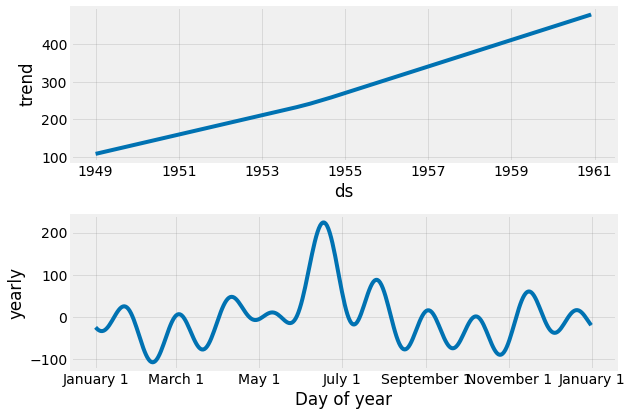

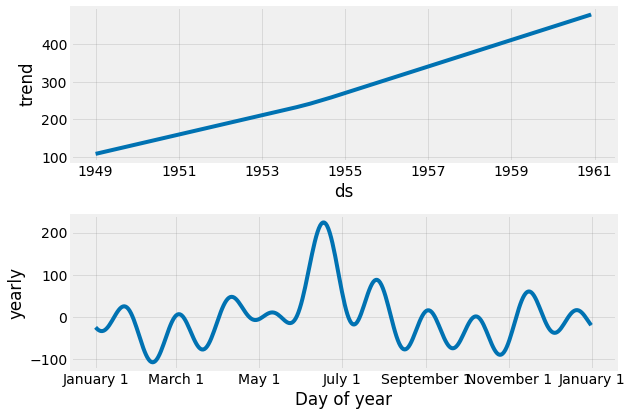

In [ ]:
my_model.plot_components(forecast)


### Amazon DeepAR

"DeepAR, a forecasting method based on autoregressive recurrent networks, which learns such a global model from historical data of all time series in the data set." It uses a similar LSTM-based recurrent neural network architecture. This only run on Amazon Sagemaker but there is an implimentation in pytorch in the link below.

Classical Techniques Problem:
 - there is a need for forecasting thousands or millions of related time series
 - Examples: forecasting forecasting the load for servers in a data center, or forecasting the demand for all products of a large retailer 
 - related time series can be leveraged for making a forecast for an individual time series. 
 - allows fitting more complex (and hence potentially more accurate) models without overfitting
 - eliminate manual feature engineering and model selection steps

Features:
- the model learns seasonal behavior and
dependencies on given covariates across time series
- by learning from similar items, it can provide forecasts for items with little or no history at all

Ref:
- DeepAR: Probabilistic Forecasting with Autoregressive Recurrent Networks
https://arxiv.org/abs/1704.04110
- https://towardsdatascience.com/prophet-vs-deepar-forecasting-food-demand-2fdebfb8d282
- Implementation in pytorch
https://github.com/zhykoties/TimeSeries



## Summary

We choose two commericial products that help with time series prediction. Prophet using statistical and non-lineare regression built for performance and interpretabilities and ease of use. It can take into account the trend, seasonality and holiday. 

DeepAR on the other hand is using deep learning technique. It is also built for scale and mass prediction capabilities. DeepAR is build to run on Amazon Sagemaker but there is an implemention for pytorch that we did not try.
